# Practice 1 : The design of the probe layout


probeinterface is a tool to handle the design of the probe layout, that will be used by all modern spike sorting algorithms. Indeed, since spike sorters are making use of the spatial positions of the channels to reconstruct the extracellular waveforms elicited during the spike of a single cell, it is crucial to know where channels are located. If you are luky, then such a probe layout is already avalaible, and you can use it instantaneously. But most of the time, depending of your recording setup/probe, you need to create one. In such a file, you must specify what are your channels, where they are in space, and what is the mapping between your recording file and the recording setup.

For this pratice you will need to have a look at

  * [probeinterface documentation](https://probeinterface.readthedocs.io/en/main/)
  * [probeinterface examples](https://probeinterface.readthedocs.io/en/main/examples/index.html)


In [2]:
%matplotlib inline
# %matplotlib widget

In [26]:
import probeinterface as pi
from probeinterface.plotting import plot_probe

from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import spikeinterface.full as si


## Using already implemented probes (such as cambridge neurotech)

In [4]:
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-236-H6'

probe = pi.get_probe(manufacturer, probe_name)
print(probe)

cambridgeneurotech - ASSY-236-H6 - 64ch - 2shanks


(<matplotlib.collections.PolyCollection at 0x7fe673bb1fc0>,
 <matplotlib.collections.PolyCollection at 0x7fe673bf9510>)

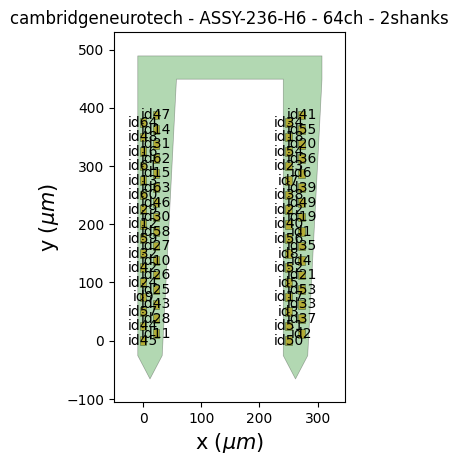

In [5]:
plot_probe(probe, with_contact_id=True)

## Let's implement the neuronexus A1x32-Poly2-10mm-50s-177 probe manually

  * https://www.neuronexus.com/files/catalog/2021-Probe-Catalog.pdf



<img src="./neuronexus_A1xPoly32.png" width="400"/>



## Step 1 : constructing a probe from channel positions

using the `Probe()` object, some methods such as
  * `Probe.set_contacts()`
  * `Probe.set_contact_ids()`
and using the file **'A1x32-Poly2-10mm-50s-177.csv'** let's try to construct the probe as an exercice.

Once this is done, then plot it with `plot_probe()` and use the `with_contact_id=True` option


In [6]:
df = pd.read_csv('A1x32-Poly2-10mm-50s-177.csv')
df

,contact_ids,x,y
0,1,0.0,300
1,2,0.0,350
2,3,0.0,400
3,4,0.0,450
4,5,0.0,500
5,6,0.0,550
6,7,0.0,600
7,8,0.0,650
8,9,0.0,700
9,10,0.0,750


In [7]:
positions = df[['x', 'y']].values
probe = pi.Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 7.5})
probe.set_contact_ids(df['contact_ids'].values)
probe

Probe - 32ch - 1shanks

(<matplotlib.collections.PolyCollection at 0x7fe6719a7370>, None)

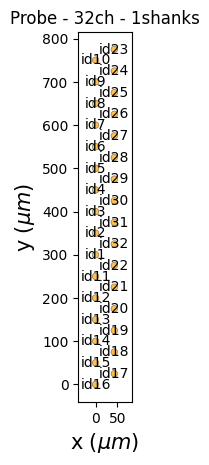

In [8]:
plot_probe(probe, with_contact_id=True)

## Step 1 : alternative method

using the `Probe()` object, some methods such as
  * `Probe.from_dataframe()`


In [9]:
df = pd.read_csv('A1x32-Poly2-10mm-50s-177.csv')
df['contact_shapes'] = 'circle'
df['radius'] = 7.5

df

,contact_ids,x,y,contact_shapes,radius
0,1,0.0,300,circle,7.5
1,2,0.0,350,circle,7.5
2,3,0.0,400,circle,7.5
3,4,0.0,450,circle,7.5
4,5,0.0,500,circle,7.5
5,6,0.0,550,circle,7.5
6,7,0.0,600,circle,7.5
7,8,0.0,650,circle,7.5
8,9,0.0,700,circle,7.5
9,10,0.0,750,circle,7.5


In [10]:
probe = pi.Probe.from_dataframe(df)
probe

Probe - 32ch - 1shanks

(<matplotlib.collections.PolyCollection at 0x7fe6719a7850>, None)

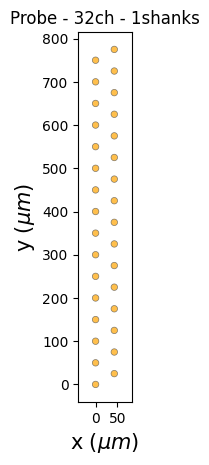

In [11]:
plot_probe(probe, with_contact_id=False)

## Step 2 : setting the contour of your probe

As you can see, you need to specify a contour for your probe. Contour can be set :
  * automatiocally with dummy shape `probe.create_auto_shape()`
  * or manuualy with `probe.set_planar_contour'()`


Here is the polygon shape of our probe, that can be reused later: 

```
contour_polygon =  [[-25, 800],
                   [-11, 0],
                   [43.3/2, -75.],
                   [54.3, 0],
                   [68.3, 800]]
```


(<matplotlib.collections.PolyCollection at 0x7fe66bf48790>,
 <matplotlib.collections.PolyCollection at 0x7fe66bf8ad70>)

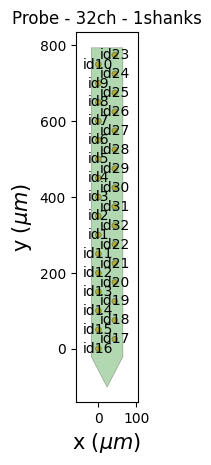

In [12]:
probe.create_auto_shape()
plot_probe(probe, with_contact_id=True)

(<matplotlib.collections.PolyCollection at 0x7fe66be1c0a0>,
 <matplotlib.collections.PolyCollection at 0x7fe66be5d480>)

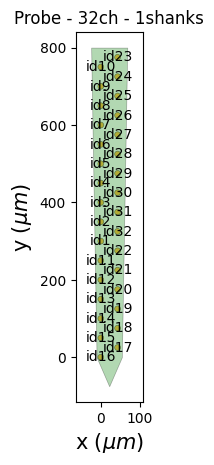

In [13]:
contour_polygon = [[-25, 800],
                   [-11, 0],
                   [43.3/2, -75.],
                   [54.3, 0],
                   [68.3, 800]]
probe.set_planar_contour(contour_polygon)
plot_probe(probe, with_contact_id=True)

## Step 3 : saving "probe unwired" into a json file

Using the function `write_probeinterface()`, you can save the probe to a file. Inspect the file and have a look to the way this is constructed.

In [14]:
pi.write_probeinterface('A1x32-Poly2-10mm-50s-177_unwired.json', probe)

In [15]:
!head -25 A1x32-Poly2-10mm-50s-177_unwired.json

{
    "specification": "probeinterface",
    "version": "0.2.17",
    "probes": [
        {
            "ndim": 2,
            "si_units": "um",
            "annotations": {
                "name": ""
            },
            "contact_annotations": {},
            "contact_positions": [
                [
                    0.0,
                    300.0
                ],
                [
                    0.0,
                    350.0
                ],
                [
                    0.0,
                    400.0
                ],
                [


## Step 4 : wiring to device channel (aka pathway or mapping)

Now lets do the "wiring" aka channel mapping. Lets connect our probe to RHD2132 INtan headstage with the H32 connector.

You can get some help by looking at https://intantech.com/RHD_headstages.html?tabSelect=RHD32ch&yPos=0

And also, note that the mapping depend on the connector of the probe, see this https://www.neuronexus.com/files/probemapping/32-channel/H32-Maps.pdf


<img src="./Intan_RDH2132_overview.png" width="400"/>
<img src="./Intan_RDH2132_connector_pineout.png" width="400"/>
<img src="./H32_neuronexus_connector_omnetics.png" width="400"/>


Probeinterface have 2 ways to make the mapping:

 1. Manually with : `probe.set_device_channel_indices()`
 2. Automatically with `probe.wiring_to_device()`
 
  
Use the `with_contact_id=True` and `with_device_index=True` option for plor_probe. Check with dataframe the mapping


(<matplotlib.collections.PolyCollection at 0x7fe66bee9c00>,
 <matplotlib.collections.PolyCollection at 0x7fe691f02e30>)

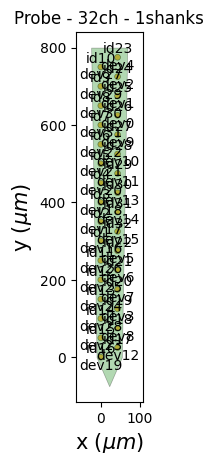

In [16]:
manual_mapping = [
    16, 17, 18, 20, 21, 22, 31, 30, 29, 27, 26, 25, 24, 28, 23, 19,
    12, 8, 3, 7, 6, 5, 4, 2, 1, 0, 9, 10, 11, 13, 14, 15]
probe.set_device_channel_indices(manual_mapping)
plot_probe(probe, with_contact_id=True, with_device_index=True)

In [17]:
probe.to_dataframe(complete=True)

,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0.0,300.0,circle,7.5,,1,16,um,1.0,0.0,0.0,1.0
1,0.0,350.0,circle,7.5,,2,17,um,1.0,0.0,0.0,1.0
2,0.0,400.0,circle,7.5,,3,18,um,1.0,0.0,0.0,1.0
3,0.0,450.0,circle,7.5,,4,20,um,1.0,0.0,0.0,1.0
4,0.0,500.0,circle,7.5,,5,21,um,1.0,0.0,0.0,1.0
5,0.0,550.0,circle,7.5,,6,22,um,1.0,0.0,0.0,1.0
6,0.0,600.0,circle,7.5,,7,31,um,1.0,0.0,0.0,1.0
7,0.0,650.0,circle,7.5,,8,30,um,1.0,0.0,0.0,1.0
8,0.0,700.0,circle,7.5,,9,29,um,1.0,0.0,0.0,1.0
9,0.0,750.0,circle,7.5,,10,27,um,1.0,0.0,0.0,1.0


(<matplotlib.collections.PolyCollection at 0x7fe671976f50>,
 <matplotlib.collections.PolyCollection at 0x7fe66bec06a0>)

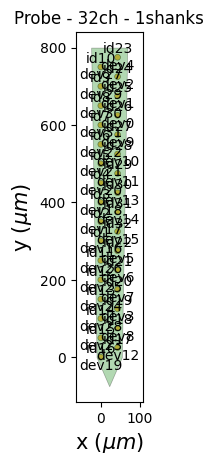

In [18]:
probe.wiring_to_device('H32>RHD2132')
plot_probe(probe, with_contact_id=True, with_device_index=True)


In [19]:
probe_df = probe.to_dataframe(complete=True)
probe_df

,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0.0,300.0,circle,7.5,,1,16,um,1.0,0.0,0.0,1.0
1,0.0,350.0,circle,7.5,,2,17,um,1.0,0.0,0.0,1.0
2,0.0,400.0,circle,7.5,,3,18,um,1.0,0.0,0.0,1.0
3,0.0,450.0,circle,7.5,,4,20,um,1.0,0.0,0.0,1.0
4,0.0,500.0,circle,7.5,,5,21,um,1.0,0.0,0.0,1.0
5,0.0,550.0,circle,7.5,,6,22,um,1.0,0.0,0.0,1.0
6,0.0,600.0,circle,7.5,,7,31,um,1.0,0.0,0.0,1.0
7,0.0,650.0,circle,7.5,,8,30,um,1.0,0.0,0.0,1.0
8,0.0,700.0,circle,7.5,,9,29,um,1.0,0.0,0.0,1.0
9,0.0,750.0,circle,7.5,,10,27,um,1.0,0.0,0.0,1.0


## Step 5 : saving the "probe wired" into json

Now that the probe has been wired, let's save it into a file and inspect the resulting file

In [20]:
pi.write_probeinterface('A1x32-Poly2-10mm-50s-177_wired.json', probe)

In [21]:
!head -25 A1x32-Poly2-10mm-50s-177_unwired.json

{
    "specification": "probeinterface",
    "version": "0.2.17",
    "probes": [
        {
            "ndim": 2,
            "si_units": "um",
            "annotations": {
                "name": ""
            },
            "contact_annotations": {},
            "contact_positions": [
                [
                    0.0,
                    300.0
                ],
                [
                    0.0,
                    350.0
                ],
                [
                    0.0,
                    400.0
                ],
                [


## important : the probe is slicing the recording

In [24]:
base_folder = Path('/home/samuel/DataSpikeSorting/SI_tutorial_marseille_2023/')
oe_folder = base_folder / 'openephys_recording/2023-08-23_15-56-05'


In [27]:
full_raw_rec = si.read_openephys(oe_folder)
full_raw_rec

OpenEphysBinaryRecordingExtractor: 72 channels - 30.0kHz - 1 segments - 9,000,000 samples 
                                   300.00s (5.00 minutes) - int16 dtype - 1.21 GiB

In [28]:
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-236-H5'

probe = pi.get_probe(manufacturer, probe_name)
probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
print(probe)

cambridgeneurotech - ASSY-236-H5 - 64ch - 1shanks


(-50.0, 300.0)

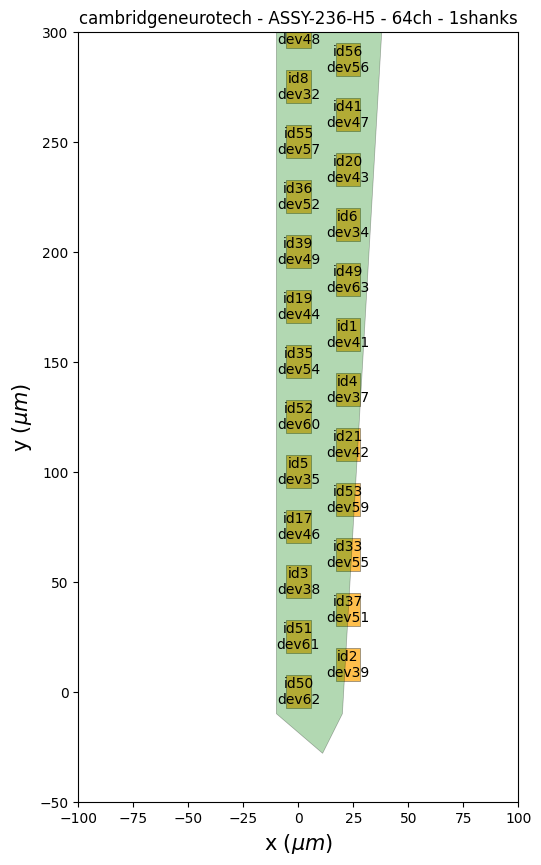

In [29]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True,)
ax.set_xlim(-100, 100)
ax.set_ylim(-50, 300)

In [30]:
probe.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]

,contact_ids,shank_ids,device_channel_indices
0,1,,41
1,2,,39
2,3,,38
3,4,,37
4,5,,35
...,...,...,...
59,60,,4
60,61,,3
61,62,,2
62,63,,1


Please that that the original recording is 72 channels and the one with a probe attached is only 64 channels

The original recording have been sliced!

In [35]:
raw_rec = full_raw_rec.set_probe(probe)
print(full_raw_rec)
print(raw_rec)

OpenEphysBinaryRecordingExtractor: 72 channels - 30.0kHz - 1 segments - 9,000,000 samples 
                                   300.00s (5.00 minutes) - int16 dtype - 1.21 GiB
ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 9,000,000 samples 
                       300.00s (5.00 minutes) - int16 dtype - 1.07 GiB


In [37]:
print(full_raw_rec.channel_ids)
print(raw_rec.channel_ids)

['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH9' 'CH10' 'CH11'
 'CH12' 'CH13' 'CH14' 'CH15' 'CH16' 'CH17' 'CH18' 'CH19' 'CH20' 'CH21'
 'CH22' 'CH23' 'CH24' 'CH25' 'CH26' 'CH27' 'CH28' 'CH29' 'CH30' 'CH31'
 'CH32' 'CH33' 'CH34' 'CH35' 'CH36' 'CH37' 'CH38' 'CH39' 'CH40' 'CH41'
 'CH42' 'CH43' 'CH44' 'CH45' 'CH46' 'CH47' 'CH48' 'CH49' 'CH50' 'CH51'
 'CH52' 'CH53' 'CH54' 'CH55' 'CH56' 'CH57' 'CH58' 'CH59' 'CH60' 'CH61'
 'CH62' 'CH63' 'CH64' 'ADC1' 'ADC2' 'ADC3' 'ADC4' 'ADC5' 'ADC6' 'ADC7'
 'ADC8']
['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH9' 'CH10' 'CH11'
 'CH12' 'CH13' 'CH14' 'CH15' 'CH16' 'CH17' 'CH18' 'CH19' 'CH20' 'CH21'
 'CH22' 'CH23' 'CH24' 'CH25' 'CH26' 'CH27' 'CH28' 'CH29' 'CH30' 'CH31'
 'CH32' 'CH33' 'CH34' 'CH35' 'CH36' 'CH37' 'CH38' 'CH39' 'CH40' 'CH41'
 'CH42' 'CH43' 'CH44' 'CH45' 'CH46' 'CH47' 'CH48' 'CH49' 'CH50' 'CH51'
 'CH52' 'CH53' 'CH54' 'CH55' 'CH56' 'CH57' 'CH58' 'CH59' 'CH60' 'CH61'
 'CH62' 'CH63' 'CH64']


PLease also note that the probe is reversed to match the order of the recording!

In [38]:
probe_rec = raw_rec.get_probe()
probe_rec.to_dataframe(complete=True).loc[:, ["contact_ids", "device_channel_indices"]]

,contact_ids,device_channel_indices
0,64,0
1,63,1
2,62,2
3,61,3
4,60,4
...,...,...
59,53,59
60,52,60
61,51,61
62,50,62
